## Introduction

##### The purpose of this project is to convince Dr. Egan's parents to visit him in Seattle by investigating whether it rains more in NYC or Seattle.

This specifc notebook takes the clean data from this linked notebook (https://colab.research.google.com/drive/1TwGVY7WTdOer2fsLM7agjK8GSaEUCmTy?usp=sharing) and creates various graphs to analyze and compare the monthly precipitation averages from the two cities.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kikayjane/Seattle-Weather/main/clean_seattle_nyc_weather.csv')

##### $\rightarrow$ Review the contents of the data set.

In [ ]:
df.head()

,date,city,precipitation,month,year
0,2020-01-01,NYC,0.013333,1,2020
1,2020-01-02,NYC,0.000000,1,2020
2,2020-01-03,NYC,0.134444,1,2020
3,2020-01-04,NYC,0.200000,1,2020
4,2020-01-05,NYC,0.040000,1,2020


In [ ]:
df.tail()

,date,city,precipitation,month,year
2917,2023-12-27,SEA,0.063333,12,2023
2918,2023-12-28,SEA,0.240000,12,2023
2919,2023-12-29,SEA,0.055000,12,2023
2920,2023-12-30,SEA,0.042500,12,2023
2921,2023-12-31,SEA,0.050000,12,2023


In [ ]:
df.describe()

,precipitation,month,year
count,2922.000000,2922.000000,2922.000000
mean,0.124740,6.522930,2021.498973
std,0.273386,3.449293,1.118531
min,0.000000,1.000000,2020.000000
25%,0.000000,4.000000,2020.000000
50%,0.013333,7.000000,2021.000000
75%,0.126859,10.000000,2022.000000
max,4.244615,12.000000,2023.000000


In [ ]:
df['precipitation'].max()

4.244615

In [ ]:
df['precipitation'].min()

0.0

In [ ]:
df.groupby(by='city').describe()

precipitation                                                    \
             count      mean       std  min  25%       50%       75%   
city                                                                   
NYC         1461.0  0.133579  0.308664  0.0  0.0  0.011538  0.122000   
SEA         1461.0  0.115901  0.232597  0.0  0.0  0.016000  0.131429   

                 month           ...                year               \
           max   count     mean  ...   75%   max   count         mean   
city                             ...                                    
NYC   4.244615  1461.0  6.52293  ...  10.0  12.0  1461.0  2021.498973   
SEA   2.710000  1461.0  6.52293  ...  10.0  12.0  1461.0  2021.498973   

                                                        
           std     min     25%     50%     75%     max  
city                                                    
NYC   1.118723  2020.0  2020.0  2021.0  2022.0  2023.0  
SEA   1.118723  2020.0  2020.0  2021.0  2022.0  2023.0  

[2 rows x 24 columns]

## State your questions

The overall problem is to compare how much it rains in Seattle and New York City. To answer this general problem, you will need to ask specific questions about the data.


*   What are the average monthly precipitation levels in Seattle and New York City?
*   How do precipitation patterns differ by season between the two cities?

*   Are there any trends in precipitation over the years in either city? Is there an increasing or decreasing trend in rainfall?

*   Which city has the most total annual precipitation?







## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

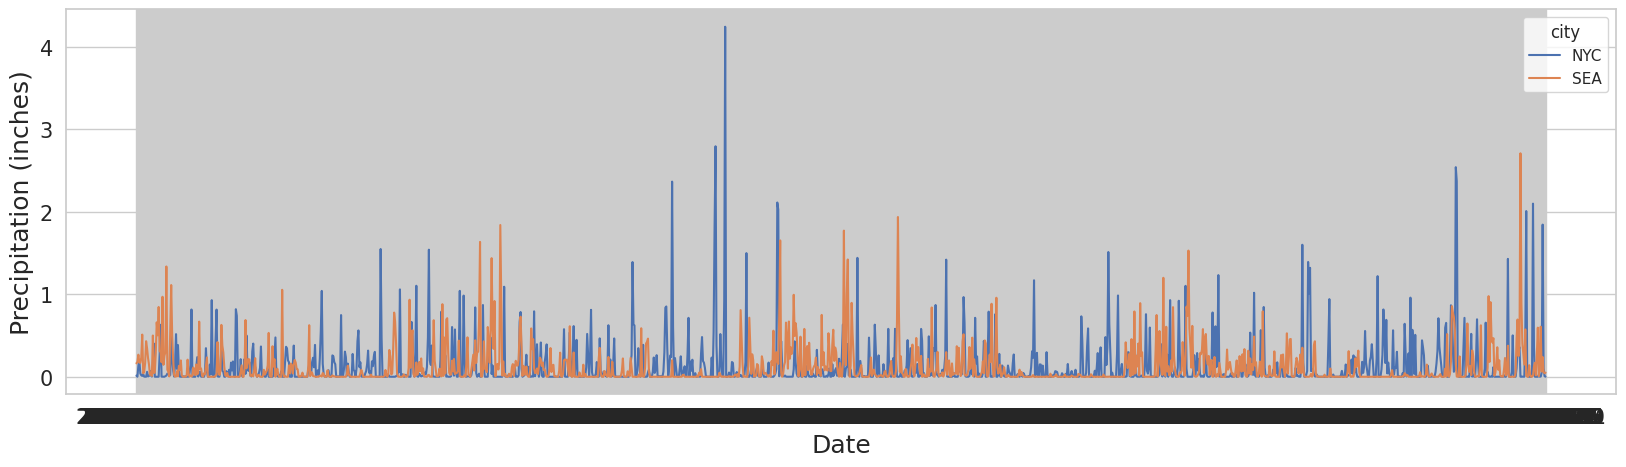

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

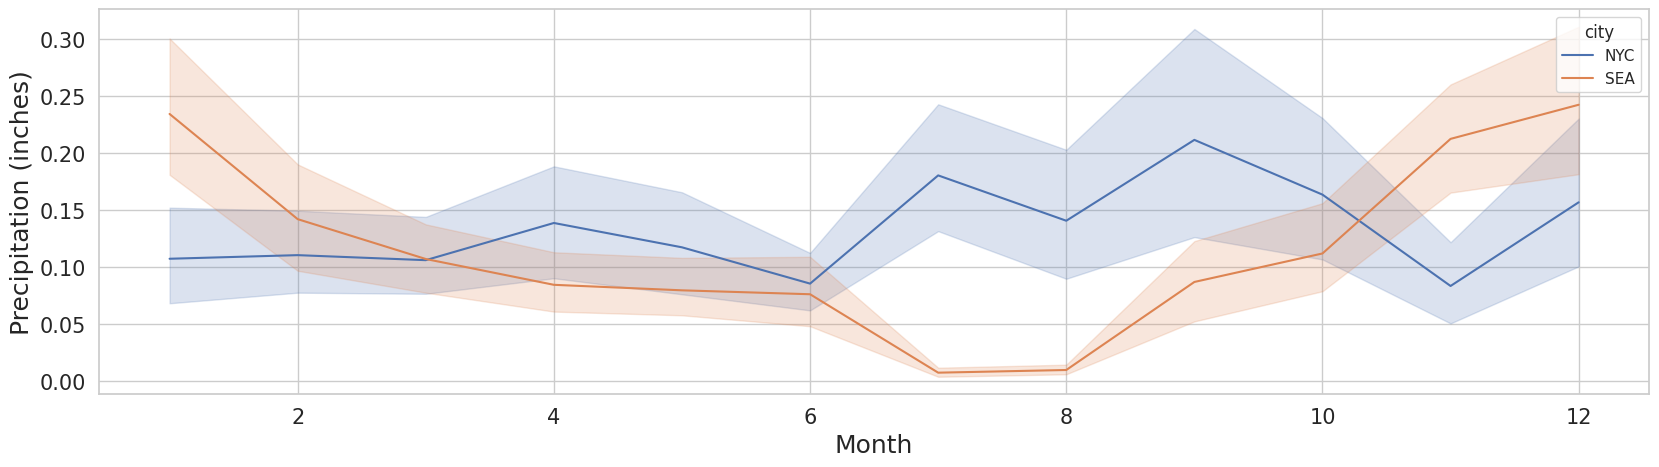

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city', errorbar="ci")

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

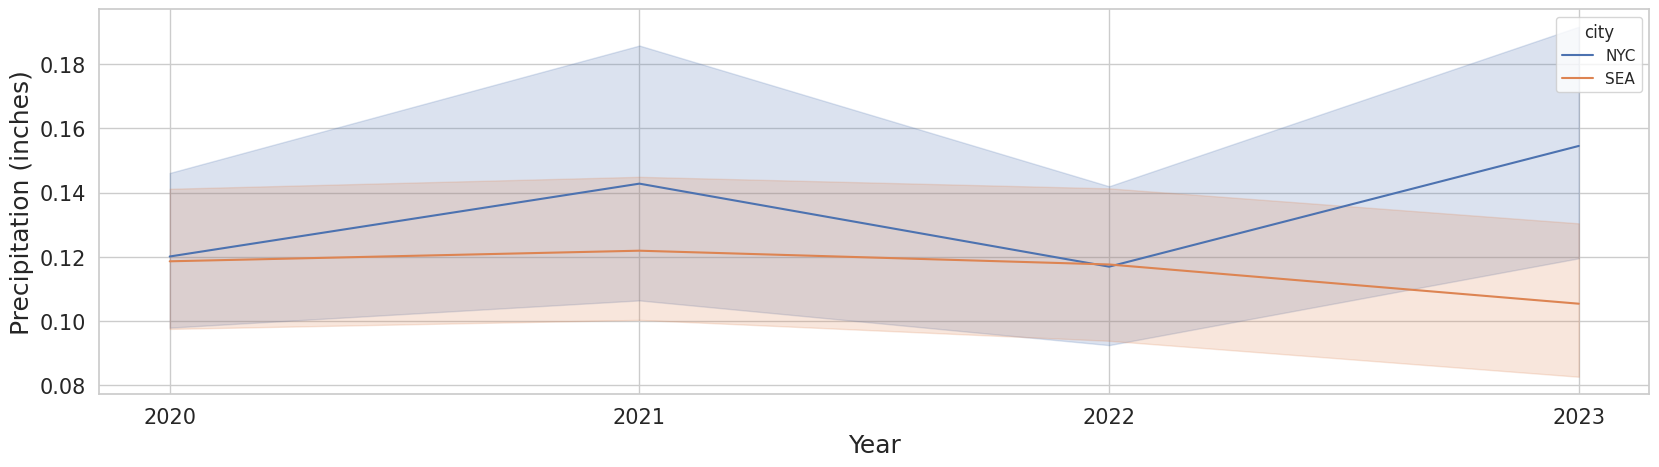

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='year', y='precipitation', hue='city', errorbar="ci")

plt.xlabel('Year', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.xticks(list(range(2020,2024)))

plt.tick_params(labelsize=15);

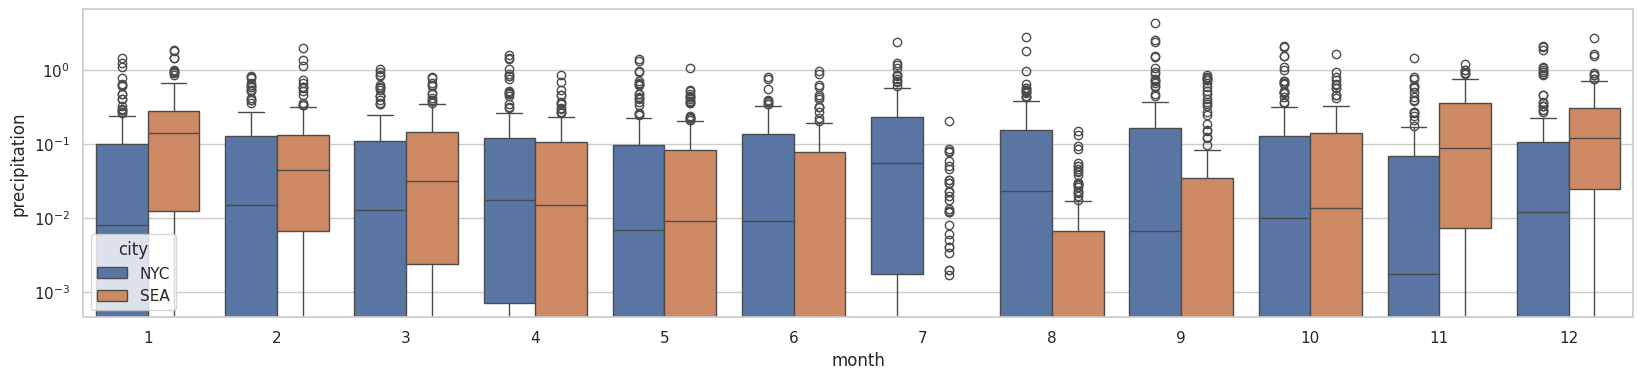

In [ ]:
plt.figure(figsize=(20,4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')
plt.yscale("log")

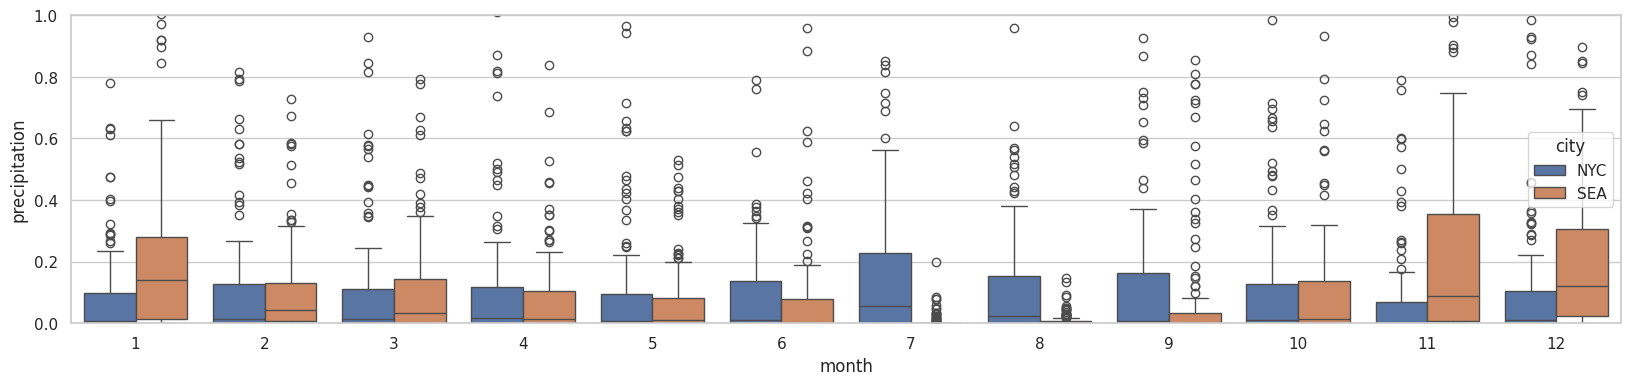

In [ ]:
plt.figure(figsize=(20,4))

sns.boxplot(data = df, x='month', y='precipitation', hue='city')

plt.ylim(0,1);

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'log(rain)')

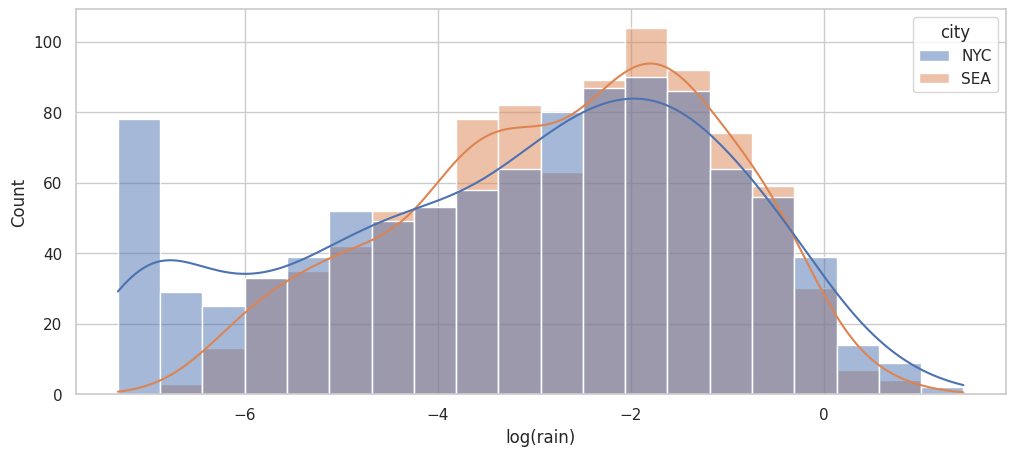

In [ ]:
df["log_precip"] = np.log(df["precipitation"])
plt.figure(figsize=(12,5))
h = sns.histplot(data=df, x="log_precip", hue="city", bins="auto", kde=True)
plt.xlabel("log(rain)")

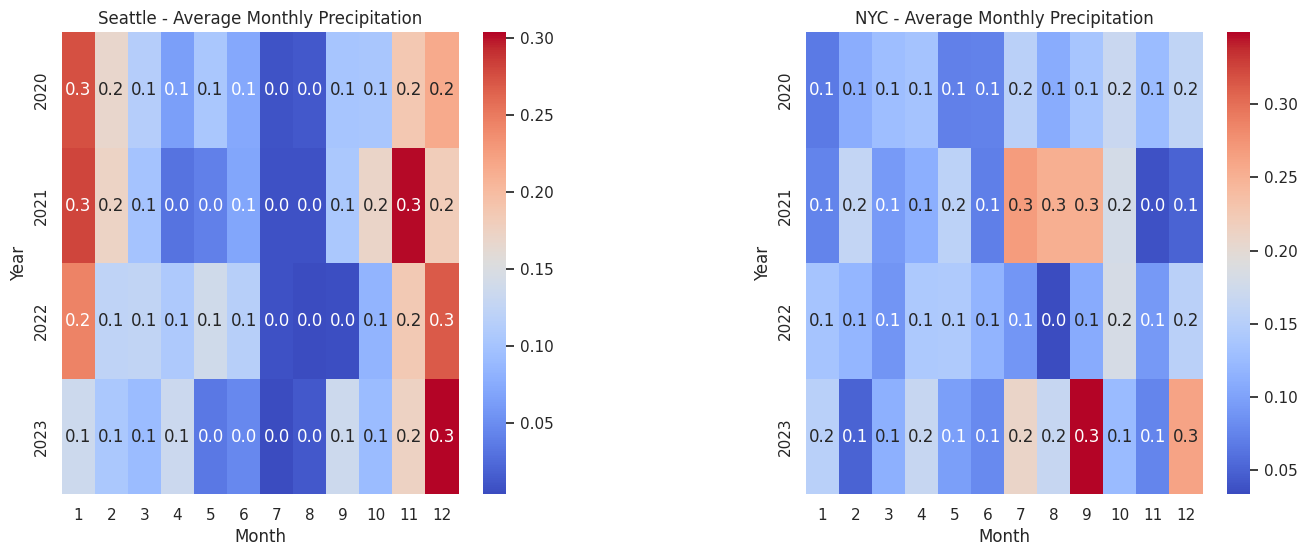

In [ ]:
from matplotlib.gridspec import GridSpec

# Calculate average monthly precipitation for each city, each month, and each year
monthly_precipitation = df.groupby(['city', 'year', 'month'])['precipitation'].mean().reset_index()

# Pivot this data for each city
pivot_seattle = monthly_precipitation[monthly_precipitation['city'] == 'SEA'].pivot(index="year", columns="month", values="precipitation")
pivot_nyc = monthly_precipitation[monthly_precipitation['city'] == 'NYC'].pivot(index="year", columns="month", values="precipitation")

# Make sure the data covers the same years for both cities, if not, you might need to adjust

# Plotting
fig = plt.figure(figsize=(16, 6))
gs = GridSpec(1, 2, figure=fig, wspace=0.5, hspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

sns.heatmap(pivot_seattle, annot=True, fmt=".1f", cmap="coolwarm", ax=ax1)
ax1.set_title('Seattle - Average Monthly Precipitation')
ax1.set_xlabel('Month')
ax1.set_ylabel('Year')

sns.heatmap(pivot_nyc, annot=True, fmt=".1f", cmap="coolwarm", ax=ax2)
ax2.set_title('NYC - Average Monthly Precipitation')
ax2.set_xlabel('Month')
ax2.set_ylabel('Year')

plt.show()

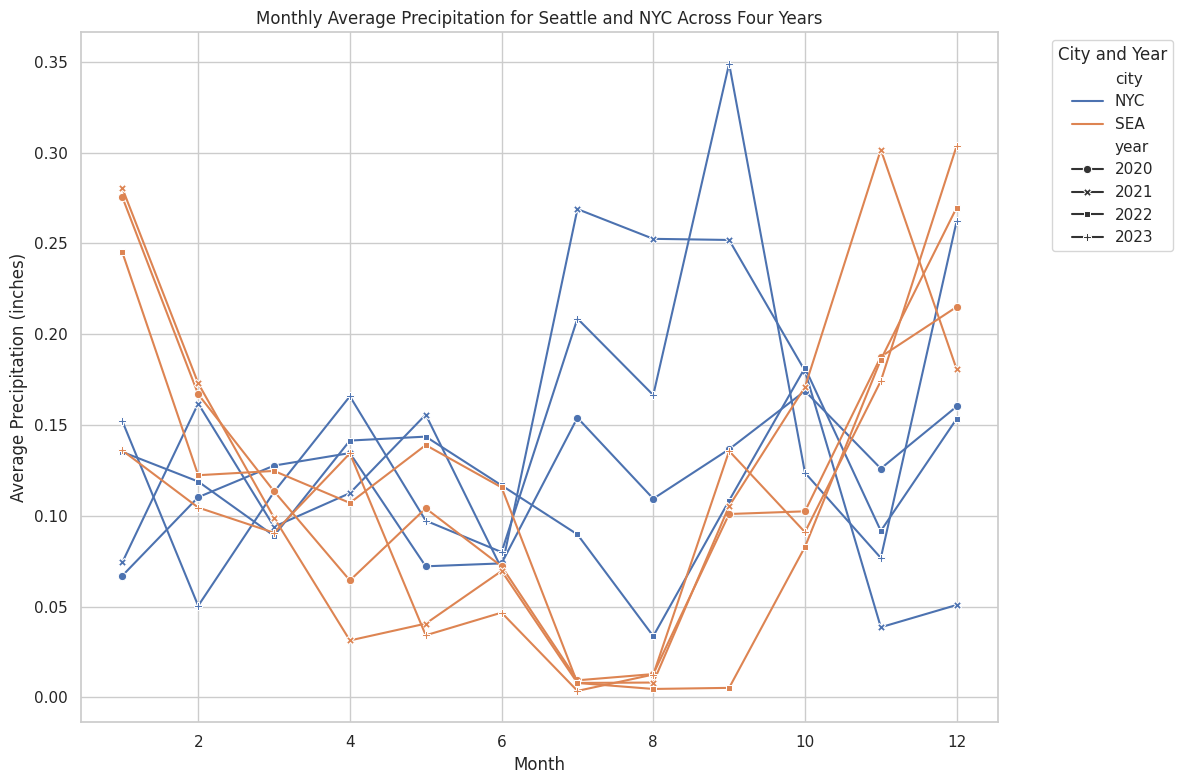

In [ ]:

# Now, we'll plot this data
plt.figure(figsize=(12, 8))

# We use seaborn's lineplot, which can automatically handle the creation of multiple lines
# 'hue' is used to differentiate lines by 'city', and 'style' by 'year' for visual distinction
sns.lineplot(data=monthly_precipitation, x='month', y='precipitation', hue='city', style='year', markers=True, dashes=False)

plt.title('Monthly Average Precipitation for Seattle and NYC Across Four Years')
plt.xlabel('Month')
plt.ylabel('Average Precipitation (inches)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='City and Year')
plt.grid(True)
plt.tight_layout()
plt.show()

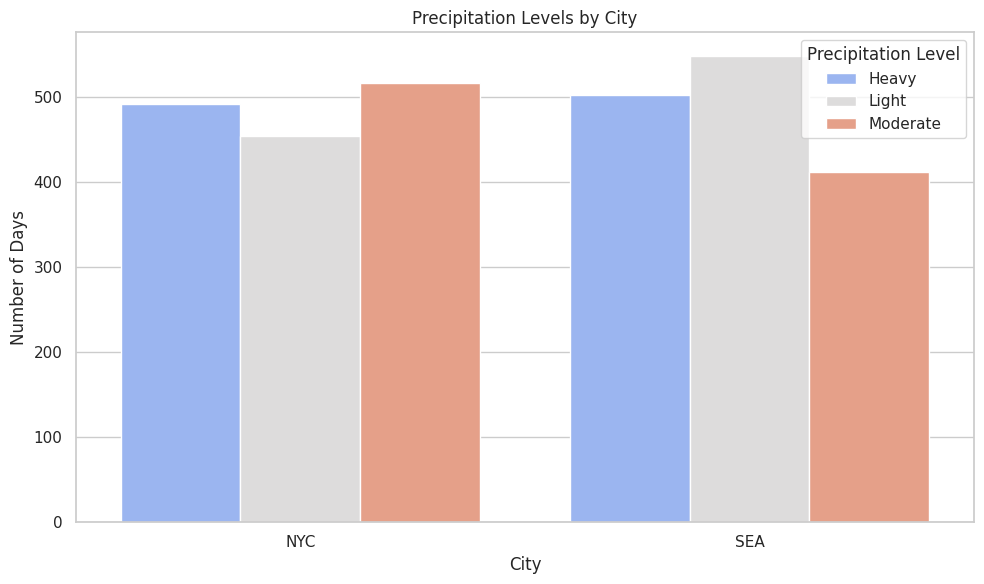

In [ ]:
# Define thresholds based on quantiles
light_precip = df['precipitation'].quantile(0.33)
moderate_precip = df['precipitation'].quantile(0.66)

# Categorize the precipitation levels using the function
def categorize_precipitation(precip):
    if precip <= light_precip:
        return 'Light'
    elif precip <= moderate_precip:
        return 'Moderate'
    else:
        return 'Heavy'

df['precip_level'] = df['precipitation'].apply(categorize_precipitation)

# Group by 'city' and 'precip_level' to get the counts for the bar plot
precip_level_counts = df.groupby(['city', 'precip_level']).size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='counts', hue='precip_level', data=precip_level_counts, palette='coolwarm')
plt.title('Precipitation Levels by City')
plt.xlabel('City')
plt.ylabel('Number of Days')
plt.legend(title='Precipitation Level')
plt.tight_layout()
plt.show()


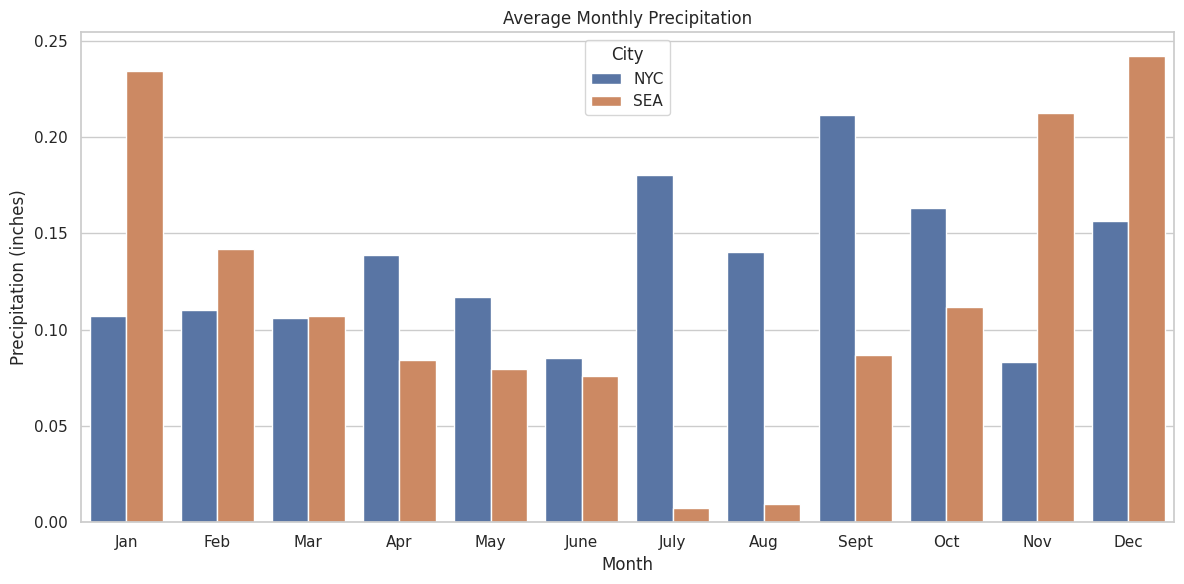

In [ ]:
pivot_df = monthly_precipitation.pivot_table(index="month", columns="city", values="precipitation", aggfunc='mean')

# Reset index so we can use 'month' as a plotting parameter
pivot_df.reset_index(inplace=True)

# Melt the DataFrame for seaborn plotting
melted_df = pd.melt(pivot_df, id_vars='month', var_name='city', value_name='precipitation')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='precipitation', hue='city', data=melted_df)
plt.title('Average Monthly Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation (inches)')
# Ensure the x-ticks correspond to the number of unique months in the data
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.legend(title='City')
plt.tight_layout()
plt.show()

### Results for communication assignment

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

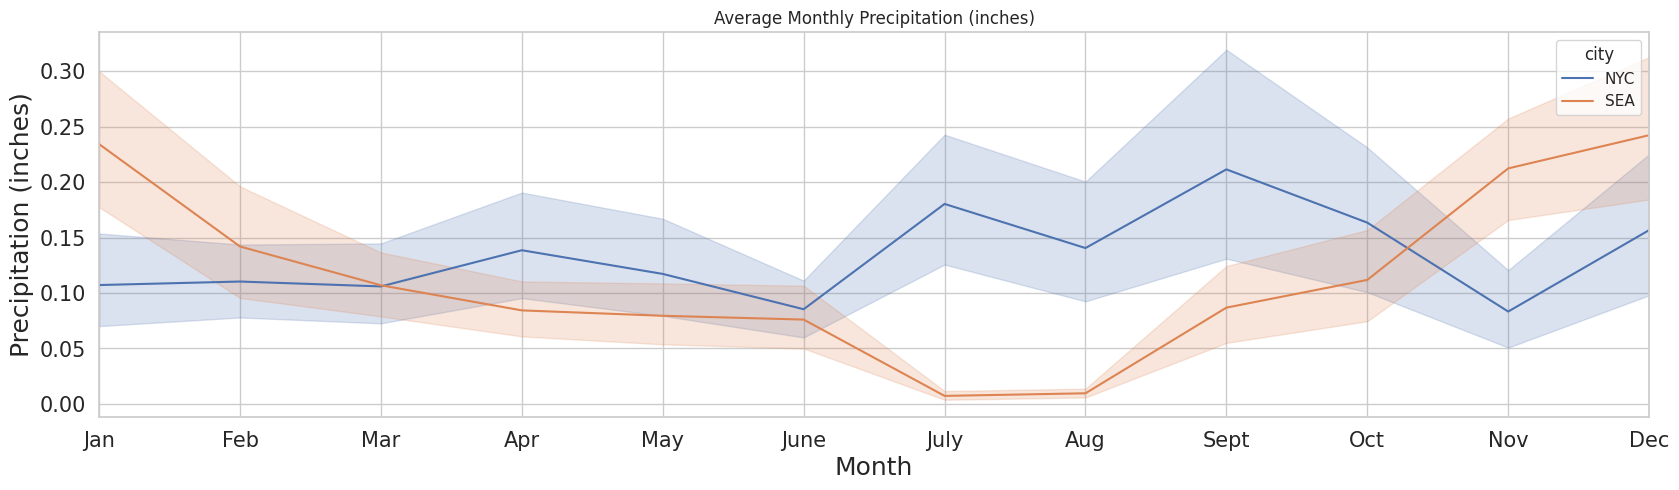

In [29]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.title('Average Monthly Precipitation (inches)')
plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
# This line below removes the extra space before Jan and after Dec
plt.xlim(1,12)
plt.tick_params(labelsize=15);

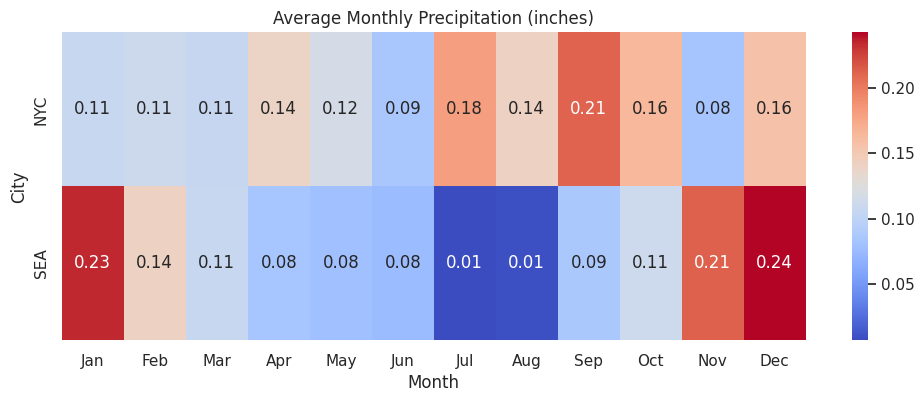

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df["precipitation"] = df["precipitation"].astype(float)

# Extract month and year again if needed
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Calculate average monthly precipitation for each city
monthly_avg_precipitation = df.groupby(['city', 'month'])['precipitation'].mean().reset_index()

# Pivot the data for heatmap
heatmap_data = monthly_avg_precipitation.pivot_table(values='precipitation', index='city', columns='month', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Average Monthly Precipitation (inches)')
plt.xlabel('Month')
plt.xticks(ticks=np.arange(12)+0.5, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('City')
plt.show()

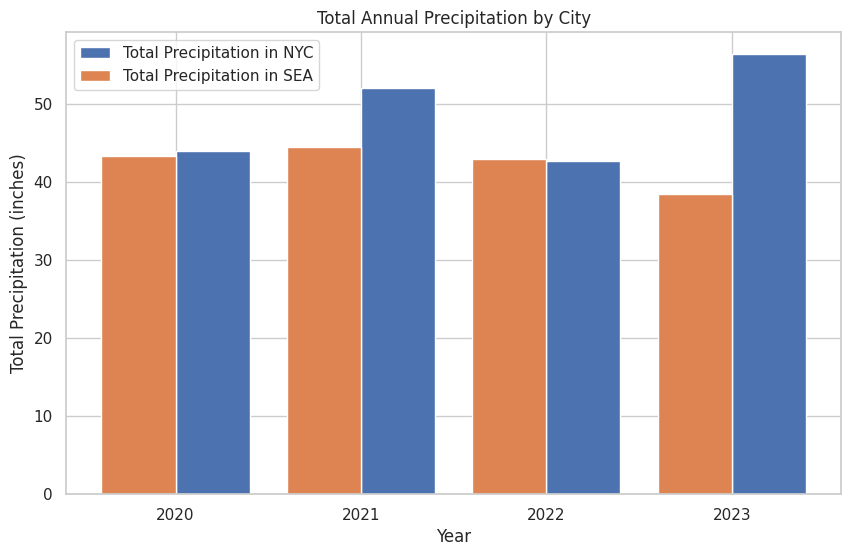

In [28]:
# Sum all precipitation data by city and year
precipitation_summary = df.groupby(['city', 'year']).precipitation.sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))

for city in precipitation_summary.city.unique():
    city_data = precipitation_summary[precipitation_summary.city == city]
    plt.bar(city_data.year + 0.2 if city == "NYC" else city_data.year - 0.2,
           city_data.precipitation, width=0.4, label=f'Total Precipitation in {city}')

# Plot the bar graphs
plt.xlabel('Year')
plt.ylabel('Total Precipitation (inches)')
plt.title('Total Annual Precipitation by City')
plt.xticks(precipitation_summary.year.unique())
plt.legend()

plt.show()

## Conclusion

Provide a brief description of your conclusions.

The graphs reveal that New York City accumulates more annual precipitation despite seattle's reputation for rain. It also indicates that Seattle experiences a distinct rainy season with higher precipitation in the colder months, while New York City's rainfall is more evenly spread throughout the year which might have contributed to the higher total rainfall over the years (with the slight exception from 2022).